Data Mining (B) Jefferson Wesley Liunardi / 0706022310046

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

This code imports the necessary libraries for data manipulation and visualization.

In [4]:
# Load the Dataset
# Download the CSV file from the URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv "
df = pd.read_csv(url, sep=',')

This code downloads the house price dataset from a URL and loads it into a pandas DataFrame for analysis.

Part A – Data Preprocessing

In [7]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
2  

This code displays the first 5 rows of the dataset to get a quick overview of the data structure and content.

In [8]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carpor

This code provides a concise summary of the DataFrame, including the data types and non-null values for each column.

In [9]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        price_in_rp          lat         long     bedrooms    bathrooms  \
count  3.553000e+03  3553.000000  3553.000000  3519.000000  3524.000000   
mean   4.191685e+09    -6.324721   106.792881     3.326513     2.624858   
std    1.375067e+10     0.129245     0.172159     2.672148     2.696497   
min    4.200000e+07    -6.894828   106.402315     1.000000     1.000000   
25%    8.000000e+08    -6.397933   106.687295     2.000000     2.000000   
50%    1.500000e+09    -6.300733   106.799954     3.000000     2.000000   
75%    3.590000e+09    -6.231754   106.874766     4.000000     3.000000   
max    5.800000e+11    -6.102478   109.771691    99.000000    99.000000   

       land_size_m2  building_size_m2     carports  maid_bedrooms  \
count   3551.000000       3551.000000  3553.000000    3553.000000   
mean     204.806815        186.587440     1.197861       0.496482   
std      402.127746        248.443471     1.114996       0.685723   
min       12.000000    

This code generates descriptive statistics for the numerical columns in the DataFrame, providing insights into the central tendency, dispersion, and shape of the data.

In [10]:
# Handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())



Missing values before handling:
url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64


This code identifies and displays the number of missing values in each column before any handling.

In [11]:
# Calculate and display missing values and their percentages
null_df = (df.isnull().mean() * 100)

# Format the percentage with two decimal places and a '%' symbol
null_df = null_df[null_df > 0].map('{:.2f}%'.format)

# Display columns with missing values and their percentages
print("\nPercentage of missing values:")
print(null_df)


Percentage of missing values:
property_type            0.03%
ads_id                   0.11%
bedrooms                 0.96%
bathrooms                0.82%
land_size_m2             0.06%
building_size_m2         0.06%
certificate              3.97%
floors                   0.17%
building_age            40.67%
year_built              40.67%
property_condition       6.92%
building_orientation    46.36%
furnishing              10.89%
dtype: object


This code calculates and displays the percentage of missing values for each column, showing which columns have missing data and to what extent.

In [12]:
# Decide and apply one strategy
# Fill missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
lat                     0
long                    0
facilities              0
property_type           0
ads_id                  0
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate             0
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
year_built              0
property_condition      0
building_orientation    0
garages                 0
furnishing              0
dtype: int64


/tmp/ipython-input-1936722402.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1936722402.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

This code applies a strategy to handle missing values by filling numerical columns with the mean and categorical columns with the mode.

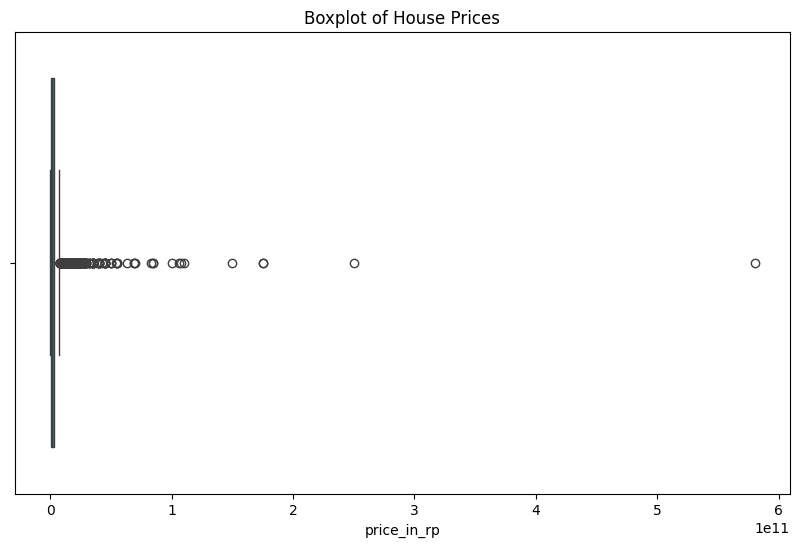

In [13]:
# Detect & handle outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_in_rp'])
plt.title('Boxplot of House Prices')
plt.show()

# Justification: The boxplot for prices shows significant outliers on the higher end,
# which can skew the analysis. We will filter the data to remove the most extreme outliers.
# We will keep houses with prices less than 20,000,000,000.
df = df[df['price_in_rp'] < 20000000000]

In [14]:
# Feature Engineering
# Create 'num_facilities' feature
df['num_facilities'] = df['facilities'].apply(lambda x: len(x.split(',')))

# Binning 'num_facilities'
bins = [0, 2, 5, 10, df['num_facilities'].max()]
labels = ['Few', 'Moderate', 'Good', 'Excellent']
df['facilities_category'] = pd.cut(df['num_facilities'], bins=bins, labels=labels, right=False)

print("\nFirst 5 rows after feature engineering:")
print(df.head())


First 5 rows after feature engineering:
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.2

This code performs feature engineering by creating a new feature representing the number of facilities and then categorizing it into bins.

In [15]:
# More Robust Outlier Handling using IQR
Q1 = df['price_in_rp'].quantile(0.25)
Q3 = df['price_in_rp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['price_in_rp'] >= lower_bound) & (df['price_in_rp'] <= upper_bound)]

print("Original number of rows:", len(df))
print("Number of rows after removing outliers:", len(df_cleaned))

# One-Hot Encoding for categorical features
categorical_cols = ['property_condition', 'facilities_category']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("\nFirst 5 rows of the dataset after one-hot encoding:")
print(df_encoded.head())

Original number of rows: 3437
Number of rows after removing outliers: 3117

First 5 rows of the dataset after one-hot encoding:
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bek

This code handles outliers in the house price using the IQR method and then applies one-hot encoding to selected categorical features for preparing the data for modeling.

PART B - Exploratory Data Analysis (EDA)

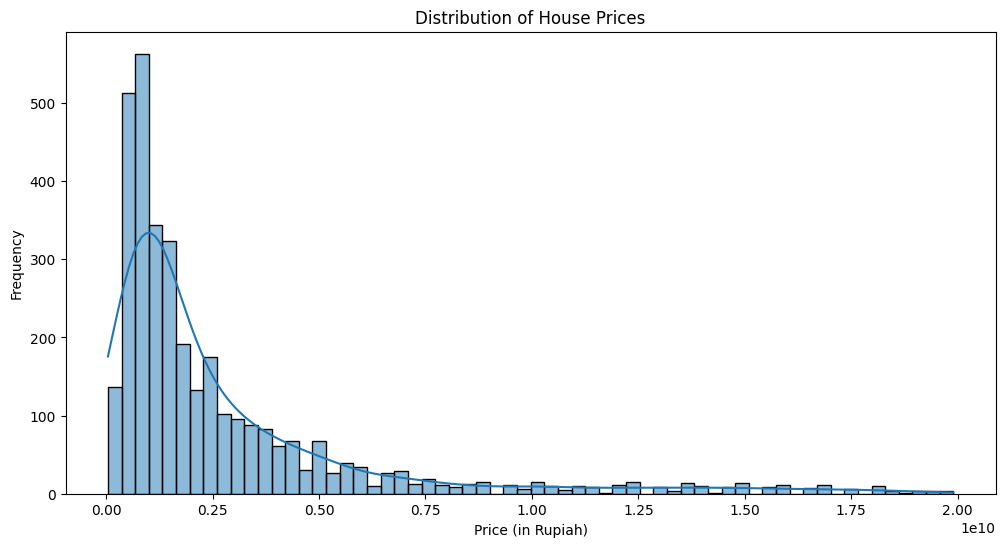

In [17]:
# Histogram of House Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price_in_rp'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Rupiah)')
plt.ylabel('Frequency')
plt.show()

### The histogram shows that the distribution of house prices is heavily skewed to the right, with a long tail towards higher prices.
### The majority of houses are priced below 2 billion Rupiah.
### The price range after outlier removal is from {df['price_in_rp'].min():.2f} to {df['price_in_rp'].max():.2f} Rupiah."

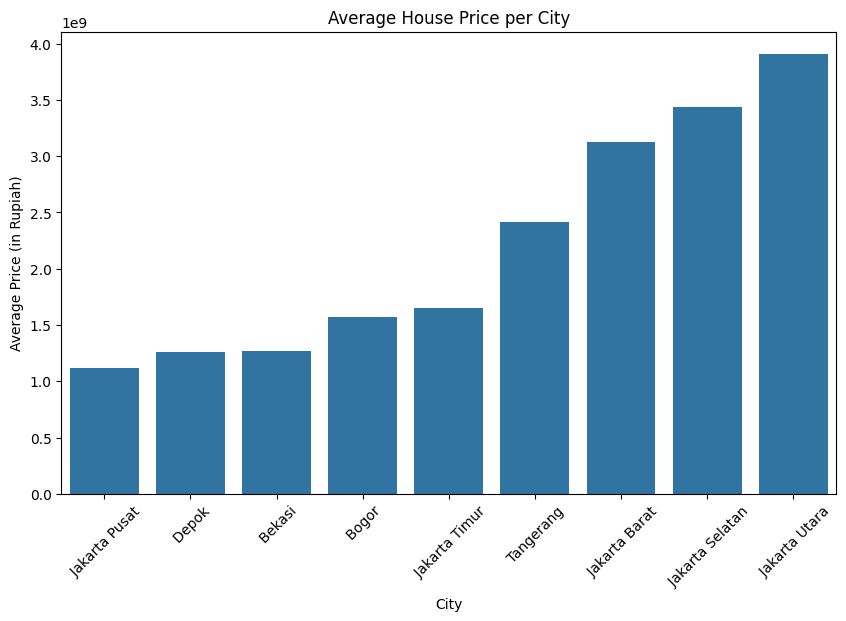

In [29]:
# Bar plot of average price per city
avg_price_per_city = df_cleaned.groupby('city')['price_in_rp'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_city.index, y=avg_price_per_city.values)
plt.title('Average House Price per City')
plt.xlabel('City')
plt.ylabel('Average Price (in Rupiah)')
plt.xticks(rotation=45)
plt.show()

### The bar plot clearly illustrates the significant price variations across cities in the Jabodetabek region.
### We can identify the most expensive city (Jakarta) and the least expensive city (Depok) based on average house prices.
###This suggests that geographical location, which is often tied to factors like development, infrastructure, and proximity to economic hubs, plays a crucial role in determining property values.


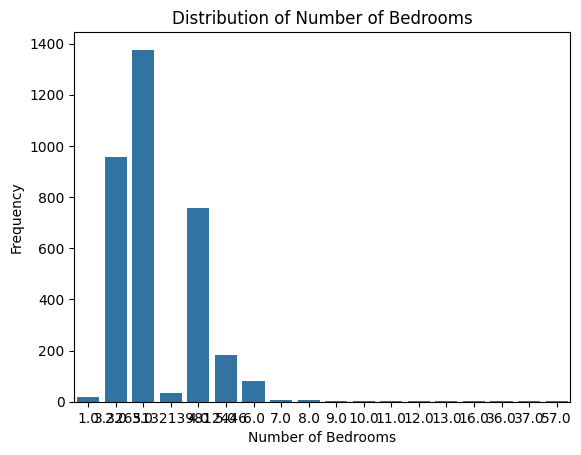

In [19]:
# Barplot of Number of Bedrooms
sns.countplot(data=df, x='bedrooms')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

### The bar plot shows that the most common number of bedrooms in the dataset is 3.
### There are also a significant number of houses with 2 and 4 bedrooms.
### The distribution shows a decreasing trend as the number of bedrooms increases, with very few houses having a large number of bedrooms.

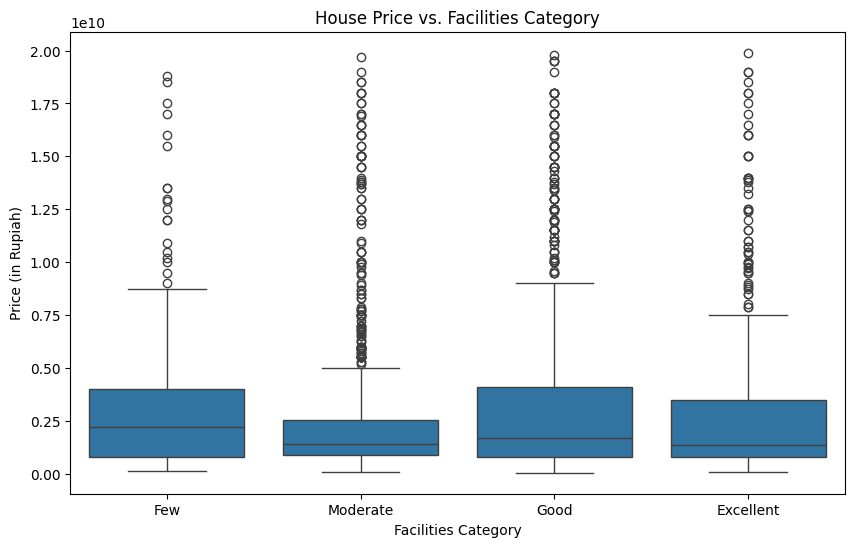

In [21]:
# Boxplot of House Price vs Facilities Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='facilities_category', y='price_in_rp')
plt.title('House Price vs. Facilities Category')
plt.xlabel('Facilities Category')
plt.ylabel('Price (in Rupiah)')
plt.show()

### The box plot shows a general trend of increasing house prices as the number of facilities increases.
### Houses with 'Excellent' facilities tend to have higher median prices and a wider price range compared to those with 'Few' or 'Moderate' facilities.
### This suggests that the number of facilities is a factor influencing house prices, with more facilities generally associated with higher values.

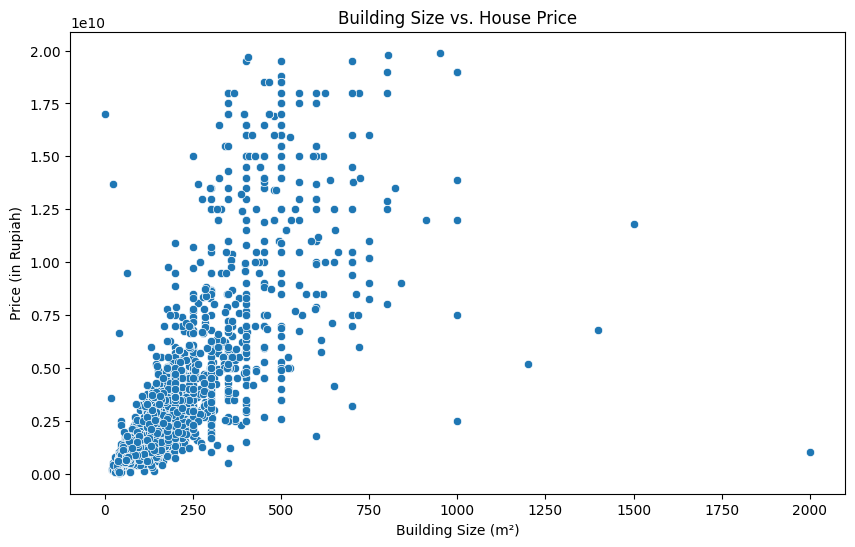

In [23]:
# Scatter plot of Building Size vs. House Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='building_size_m2', y='price_in_rp')
plt.title('Building Size vs. House Price')
plt.xlabel('Building Size (m²)')
plt.ylabel('Price (in Rupiah)')
plt.show()

### The scatter plot shows a general positive correlation between building size and house price.
### As the building size increases, the house price tends to increase as well.
### However, there is a significant spread in prices for similar building sizes, indicating other factors also influence the price.
### The relationship appears somewhat non-linear, with the price increase being more pronounced for larger building sizes.

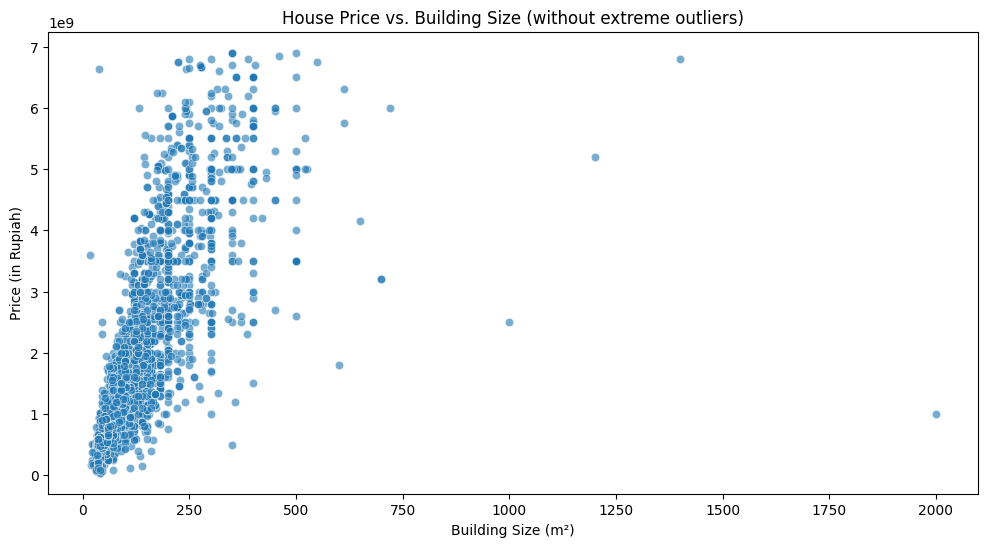

In [28]:
# Detailed Scatter Plot for highly correlated variables
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='building_size_m2', y='price_in_rp', alpha=0.6)
plt.title('House Price vs. Building Size (without extreme outliers)')
plt.xlabel('Building Size (m²)')
plt.ylabel('Price (in Rupiah)')
plt.show()

### This scatter plot shows a clear positive correlation between building size and house price.
### As the building size increases, the house price tends to increase.
### However, there is a wide spread of prices for houses of a similar size, which suggests that other factors not included in this plot (like location or number of facilities) also heavily influence the final price.
### This plot visually supports the findings from the correlation heatmap.

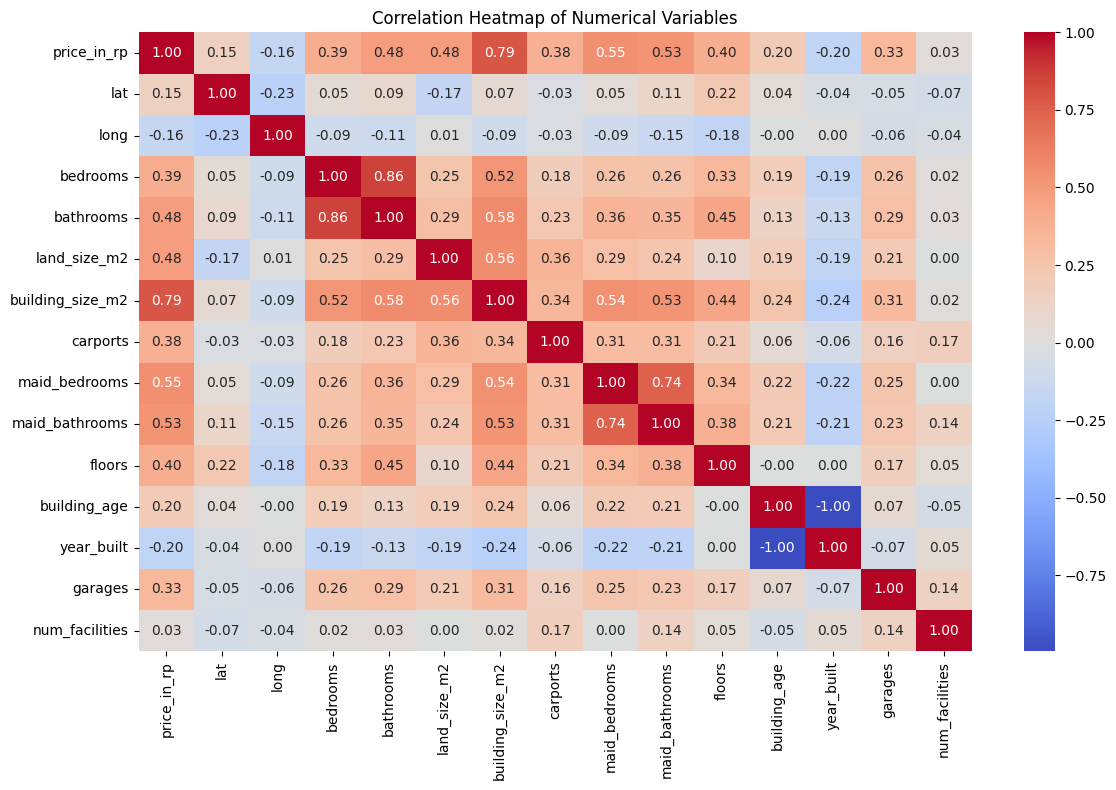

In [25]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### The heatmap shows the correlation coefficients between the numerical features.
### Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate little or no linear correlation.
### Notable correlations with 'price_in_rp' include:
### - Building size ('building_size_m2') shows a strong positive correlation.
### - Land size ('land_size_m2') shows a moderate positive correlation.
### - Number of bedrooms and bathrooms also show positive correlations, as expected.